In [173]:
# Import Packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [174]:
# Read Data 
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [175]:
#* Function to convert non-Numerical data to numerical data 
#  as linerar regrission deal only with numerical data (numbers)
# *#
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:     # check that data not numerical
            column_contents = df[column].values.tolist()                        # convert column which include not numerical to list
            unique_elements = set(column_contents)                              # then set the list to give a uniqe elements
            x = 0
            for unique in unique_elements:                                      # then loop on uniqe elements and set it to value of
                if unique not in text_digit_vals:                               # x where x(0,1,2,...) according to number of uniqe  
                    text_digit_vals[unique] = x                                 # elements
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))                  # then  map the function we created before to the 
                                                                                # pandas column (return a result after applying a 
    return df                                                                   # function to every item of an iterable(list))

In [176]:
data= handle_non_numerical_data(df)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,3,1725.55230
2,28,1,33.000,3,1,3,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,1,2205.98080
1335,18,0,36.850,0,1,3,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [177]:
# Add ones column ( as i need this during multpliction to kep the value of biace)
data.insert(0, "ones", 1)
data

,ones,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0,0,0,16884.92400
1,1,18,1,33.770,1,1,3,1725.55230
2,1,28,1,33.000,3,1,3,4449.46200
3,1,33,1,22.705,0,1,2,21984.47061
4,1,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...,...
1333,1,50,1,30.970,3,1,2,10600.54830
1334,1,18,0,31.920,0,1,1,2205.98080
1335,1,18,0,36.850,0,1,3,1629.83350
1336,1,21,0,25.800,0,1,0,2007.94500


In [178]:
COLs = data.shape[1]                                  # number of columns of the data 
# Now i will separate data to X(input data) , Y(output data)
X = data.iloc[:,0:COLs-1]
Y = data.iloc[:,COLs-1:COLs]
print("X = \n" , X.head(5))
print("Y = \n" , Y.head(5))

X = 
    ones  age  sex     bmi  children  smoker  region
0     1   19    0  27.900         0       0       0
1     1   18    1  33.770         1       1       3
2     1   28    1  33.000         3       1       3
3     1   33    1  22.705         0       1       2
4     1   32    1  28.880         0       1       2
Y = 
        charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520


In [179]:
# convert X,Y to matrices and give initial values to variables(let call it  theta1,theta2,....)
X = np.matrix(X.values)
Y = np.matrix(Y.values)
Theta = np.matrix(np.array([0,0,0,0,0,0,0]))    # as i need 7 theta

# MODEL

In [180]:
# frist compute the cost function
def Cost_fun (x, y, theta):
    diff_square = np.power(((x * theta.T)-y),2)
    return np.sum(diff_square) / (2*len(x))

Cost = Cost_fun(X,Y,Theta)
Cost

161323436.79435235

In [181]:
# then i try to implement the function of Gradiant Descent to reduce the error
def Gradiant_Descert(x, y, theta, alpha, iteratation):
    temp = np.matrix(np.zeros(theta.shape))                 # theta s
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iteratation)
    
    for i in range(iteratation):
        error = (x * theta.T) - y
        for j in range(parameters):
            in_sum = np.multiply(error,x[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(x)) * np.sum(in_sum))
            
        theta = temp 
        cost[i] = Cost_fun(x, y, theta)
        
    return theta, cost

In [190]:
alpha = 0.001
iterations = 100
g, cost = Gradiant_Descert(X, Y, Theta, alpha, iterations)
print("Theta \n:", g)
print("cost \n:", cost)


Theta 
: [[-8.71192991e+21 -3.70307663e+23 -4.39600360e+21 -2.72307555e+23
  -9.65495210e+21 -6.94714315e+21 -1.35457062e+22]]
cost 
: [3.20449910e+08 7.43508182e+08 1.86821194e+09 4.85819528e+09
 1.28069057e+10 3.39380770e+10 9.01139836e+10 2.39454094e+11
 6.36465328e+11 1.69189452e+12 4.49768606e+12 1.19567048e+13
 3.17860327e+13 8.45010423e+13 2.24640549e+14 5.97192532e+14
 1.58759833e+15 4.22052928e+15 1.12200091e+16 2.98276819e+16
 7.92949988e+16 2.10800721e+17 5.60400336e+17 1.48978872e+18
 3.96050875e+18 1.05287611e+19 2.79900431e+19 7.44097529e+19
 1.97813605e+20 5.25874912e+20 1.39800507e+21 3.71650775e+21
 9.88009994e+21 2.62656185e+22 6.98254797e+22 1.85626605e+23
 4.93476548e+23 1.31187608e+24 3.48753928e+24 9.27140181e+24
 2.46474332e+25 6.55236367e+25 1.74190429e+26 4.63074198e+26
 1.23105336e+27 3.27267722e+27 8.70020466e+27 2.31289418e+28
 6.14868237e+28 1.63458818e+29 4.34544892e+29 1.15521001e+30
 3.07105249e+30 8.16419811e+30 2.17040024e+31 5.76987128e+31
 1.53388366

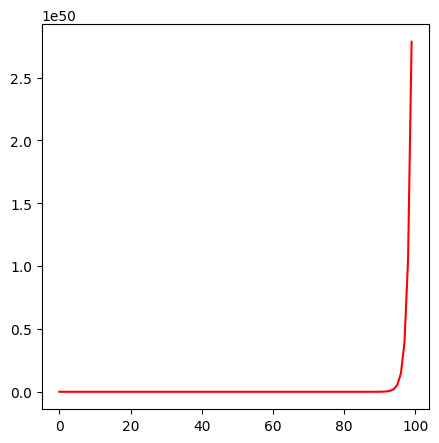

In [199]:
# plot error graph          !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
fig , ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iterations),cost,'r')
#هى مقلوبه تقريبا بس مش عارف لى بصراحه